<a href="https://colab.research.google.com/github/tejalvs/RobotOdometryMining/blob/main/Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.express as px


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
roomba_data=pd.read_csv('/content/drive/My Drive/Roomba_XY.csv')
mobile_robot_data=pd.read_csv('/content/drive/My Drive/MobileRobot_XY.csv')

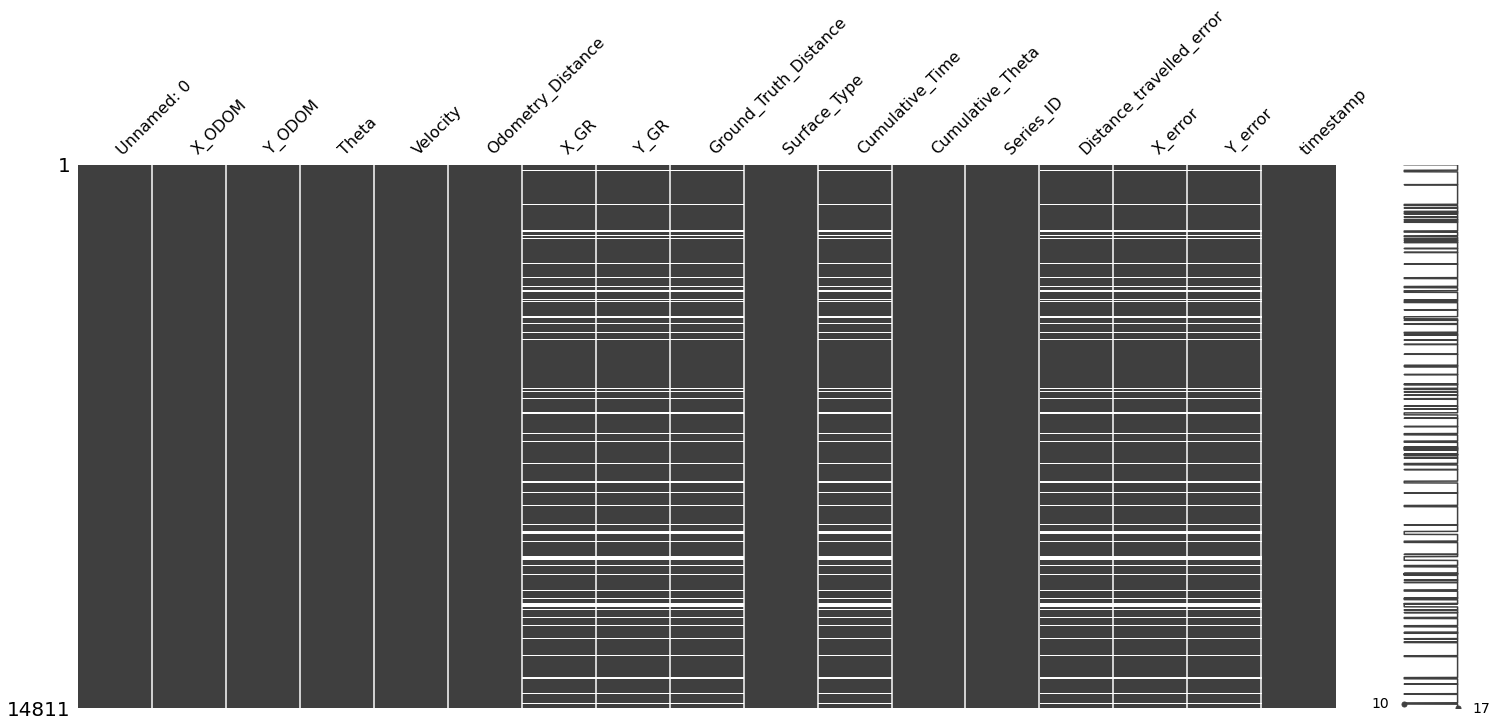

In [21]:
import missingno as msno
  

mobile_robot_data=mobile_robot_data.drop('Time_To_Travel',axis=1)
# Visualize the number of missing
msno.matrix(mobile_robot_data)


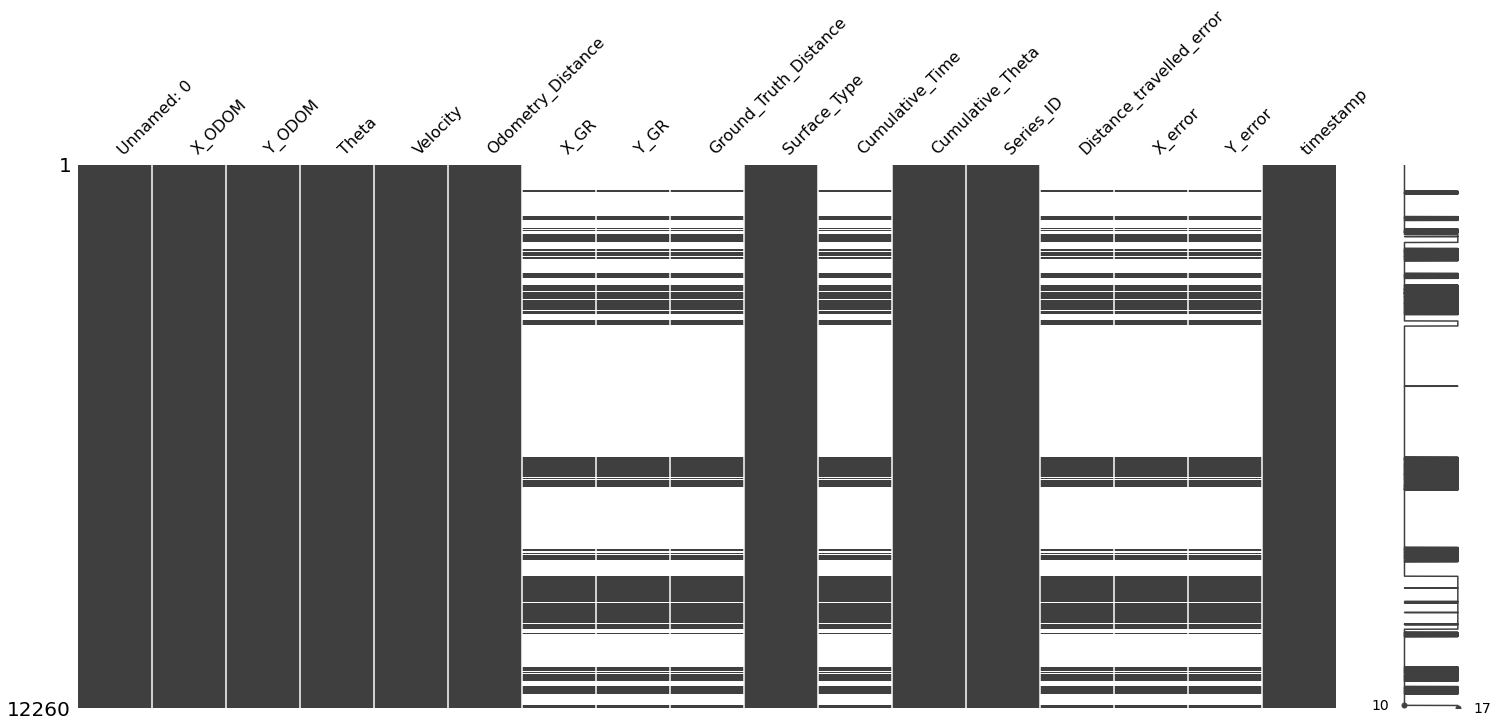

In [22]:
roomba_data=roomba_data.drop('Time_To_Travel',axis=1)
msno.matrix(roomba_data)

In [ ]:
roomba_data = roomba_data.dropna()
roomba_data.isnull().sum()

Unnamed: 0                  0
X_ODOM                      0
Y_ODOM                      0
Theta                       0
Velocity                    0
Odometry_Distance           0
X_GR                        0
Y_GR                        0
Ground_Truth_Distance       0
Surface_Type                0
Time_To_Travel              0
Cumulative_Time             0
Cumulative_Theta            0
Series_ID                   0
Distance_travelled_error    0
X_error                     0
Y_error                     0
timestamp                   0
dtype: int64

In [ ]:
roomba_data['is_duplicate'] = roomba_data.duplicated()
roomba_data['is_duplicate'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



False    3815
Name: is_duplicate, dtype: int64

In [ ]:
roomba_data=roomba_data.drop(columns=['is_duplicate'])

In [ ]:

mobile_robot_data = mobile_robot_data.dropna()
mobile_robot_data.isnull().sum()

Unnamed: 0                  0
X_ODOM                      0
Y_ODOM                      0
Theta                       0
Velocity                    0
Odometry_Distance           0
X_GR                        0
Y_GR                        0
Ground_Truth_Distance       0
Surface_Type                0
Time_To_Travel              0
Cumulative_Time             0
Cumulative_Theta            0
Series_ID                   0
Distance_travelled_error    0
X_error                     0
Y_error                     0
timestamp                   0
dtype: int64

In [ ]:
mobile_robot_data['is_duplicate'] = mobile_robot_data.duplicated()
mobile_robot_data['is_duplicate'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



False    13318
Name: is_duplicate, dtype: int64

In [ ]:
mobile_robot_data=mobile_robot_data.drop(columns=['is_duplicate'])

In [ ]:
mobile_robot_data.to_csv('/content/drive/My Drive/MobileRobot_XY_cleaned.csv', sep=',')
roomba_data.to_csv('/content/drive/My Drive/RoombaData_XY_cleaned.csv', sep=',')